Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Class Names: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.1135 - loss: 3.4807 - val_accuracy: 0.1727 - val_loss: 2.5302
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 999ms/step - accuracy: 0.2355 - loss: 2.4215 - val_accuracy: 0.3660 - val_loss: 2.1307
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.4625 - loss: 1.7838 - val_accuracy: 0.5258 - val_loss: 1.7073
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 993ms/step - accuracy: 0.6717 - loss: 1.1260 - val_accuracy: 0.5979 - val_loss: 1.6985
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 514s 10s/step - accuracy: 0.7961 - loss: 0.7683 - val_accuracy: 0.6804 - val_loss: 1.6380
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.84

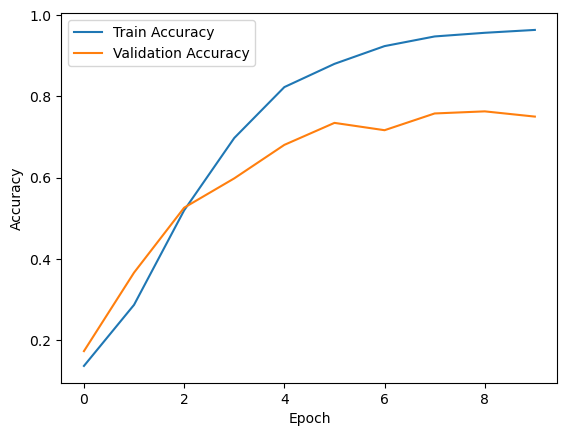

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

dataset_path = "C:/Users/ASUS/Documents/Training.csv[1]/Animal Classification/dataset"   # Update this path

img_size = (224, 224) 
batch_size = 32  

train_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class Names:", class_names)

normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(class_names), activation='softmax')  # Multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save("animal_classification_model.keras")

def predict_image(image_path):
    if not os.path.exists(image_path):
        print(f"Error: File not found at {image_path}")
        return None, None

    img = keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100
    return predicted_class, confidence


Found 1944 files belonging to 15 classes.
Using 1556 files for training.


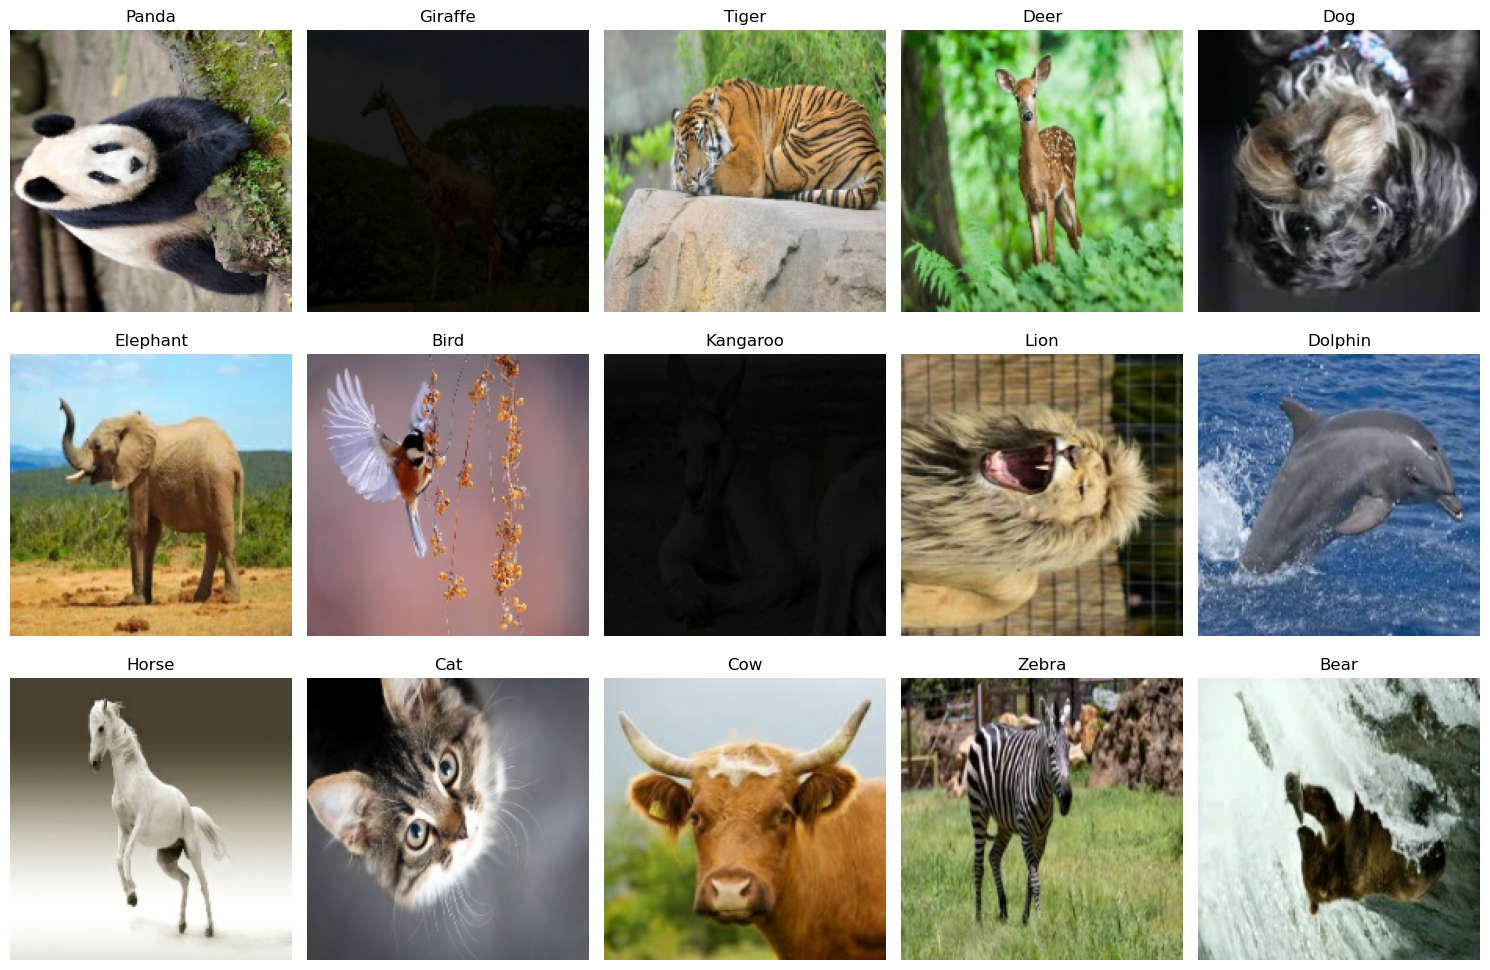

In [72]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

dataset_path = "C:/Users/ASUS/Documents/Training.csv[1]/Animal Classification/dataset"   

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names

animal_images = {}
for images, labels in train_ds:
    for img, lbl in zip(images.numpy(), labels.numpy()):
        class_name = class_names[lbl]
        if class_name not in animal_images:
            animal_images[class_name] = img  # Store one image per class
        if len(animal_images) == 15:  # Stop when 15 classes are collected
            break
    if len(animal_images) == 15:
        break

plt.figure(figsize=(15, 10))
for i, (animal, img) in enumerate(animal_images.items()):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(img.astype("uint8"))
    plt.title(animal)  # Display class name
    plt.axis("off")  # Hide axes

plt.tight_layout()
plt.show()


In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "C:/Users/ASUS/Documents/Training.csv[1]/Animal Classification/dataset"  

main_data = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2   
)

In [74]:
train_data = main_data.flow_from_directory(
    data_dir,
    target_size=(256, 256), 
    batch_size=32,           
    class_mode='binary',     
    subset='training'        
)

Found 1561 images belonging to 15 classes.


In [75]:

validation_data = main_data.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'      
)

Found 383 images belonging to 15 classes.


In [76]:
import tensorflow as tf


dataset_path = "C:/Users/ASUS/Documents/Training.csv[1]/Animal Classification/dataset"

batch_size = 32
img_height = 180
img_width = 180

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_dataset.class_names

print("Type of train_dataset:", type(train_dataset))
print("Type of validation_dataset:", type(validation_dataset))
print("Class indices:", {class_name: i for i, class_name in enumerate(class_names)})  # Equivalent to class_indices
print("Image shape:", (img_height, img_width, 3))  # RGB images have 3 channels


Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Type of train_dataset: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
Type of validation_dataset: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
Class indices: {'Bear': 0, 'Bird': 1, 'Cat': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Dolphin': 6, 'Elephant': 7, 'Giraffe': 8, 'Horse': 9, 'Kangaroo': 10, 'Lion': 11, 'Panda': 12, 'Tiger': 13, 'Zebra': 14}
Image shape: (180, 180, 3)


In [77]:
images, labels = next(train_data)  # checking type of images 
print(type(images[0]))

<class 'numpy.ndarray'>


In [78]:
train_data[0][1]

array([13.,  4., 10.,  2.,  8.,  6.,  6.,  5.,  7.,  7.,  9., 13.,  8.,
       12., 10., 12.,  6., 14., 13., 12.,  2.,  4., 14.,  1.,  5.,  6.,
       10., 10.,  7.,  1.,  6., 14.], dtype=float32)

In [79]:
image, label =train_data[0]  
print(images.shape) 
print(labels.shape)

(32, 256, 256, 3)
(32,)


In [80]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))   

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))  


model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())  

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,480,705 (101.02 MB)

 Trainable params: 26,480,705 (101.02 MB)

 Non-trainable params: 0 (0.00 B)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Detected classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Number of classes: 15


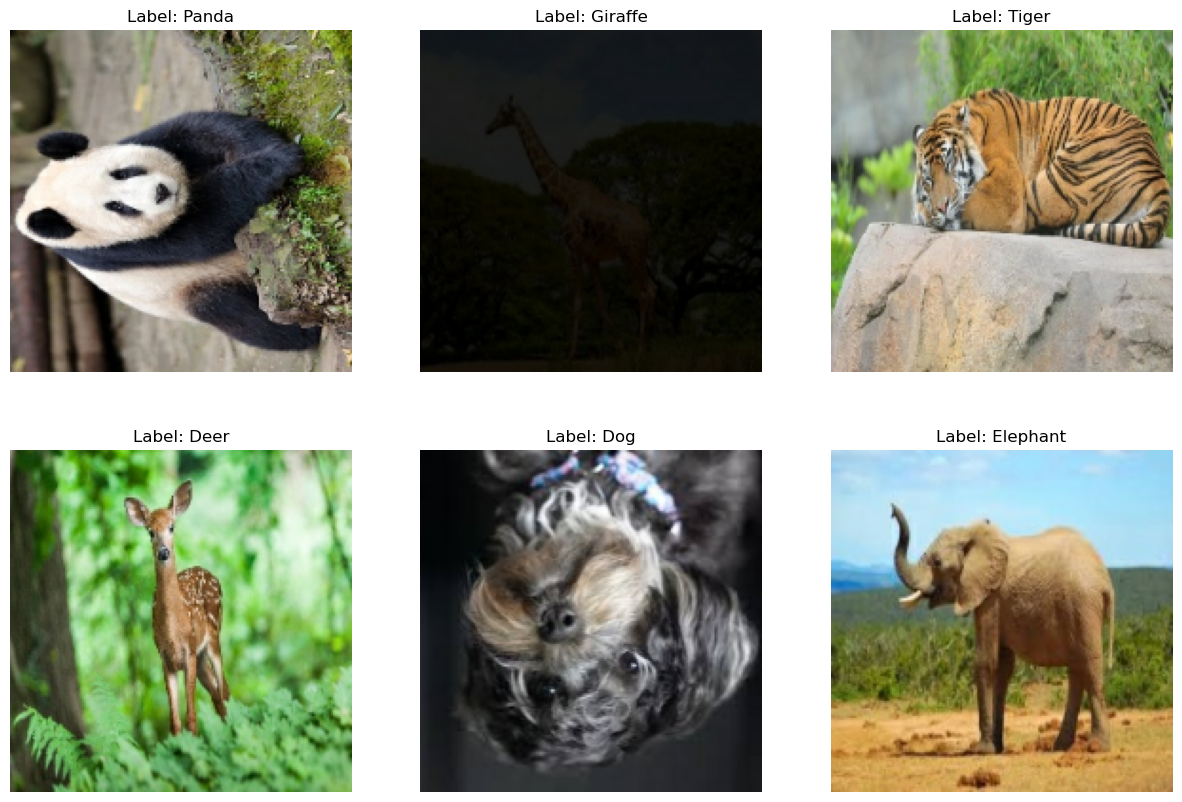

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,204,559 (50.37 MB)

 Trainable params: 13,204,559 (50.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 655ms/step - accuracy: 0.0997 - loss: 2.8381 - val_accuracy: 0.1753 - val_loss: 2.4671
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 644ms/step - accuracy: 0.2368 - loss: 2.3940 - val_accuracy: 0.3299 - val_loss: 2.0927
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 642ms/step - accuracy: 0.4038 - loss: 1.9610 - val_accuracy: 0.4794 - val_loss: 1.8510
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 618ms/step - accuracy: 0.5600 - loss: 1.5141 - val_accuracy: 0.5077 - val_loss: 1.6781
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 623ms/step - accuracy: 0.6653 - loss: 1.1744 - val_accuracy: 0.6443 - val_loss: 1.4962
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 643ms/step - accuracy: 0.7771 - loss: 0.8005 - val_accuracy: 0.6881 - val_loss: 1.4002
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 646ms/step - accuracy: 0.8626 - loss: 0.4801 - val_accuracy: 0.7165 - val_loss: 1.5208
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 635ms/step - accuracy: 0.9000 - loss: 0.3680 - val_accu

In [83]:
import tensorflow as tf
import matplotlib.pyplot as plt

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

class_names = train_ds.class_names
print("Detected classes:", class_names)
print("Number of classes:", len(class_names))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


for images, labels in train_ds.take(1): 
    plt.figure(figsize=(15, 10))
    for i in range(6):  
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = labels[i].numpy()
        label_name = class_names[label_index]
        plt.title(f"Label: {label_name}")
        plt.axis("off")
    plt.show()

num_classes = len(class_names)  # Should be 15 for your case

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Increased neurons for better learning
    tf.keras.layers.Dropout(0.5),  # Prevent overfitting
    
    tf.keras.layers.Dense(num_classes)  # Output layer for 15 animals
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

# Step 7: Train the Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15  # You can increase this if the model needs more training
)

val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {val_accuracy:.2f}")


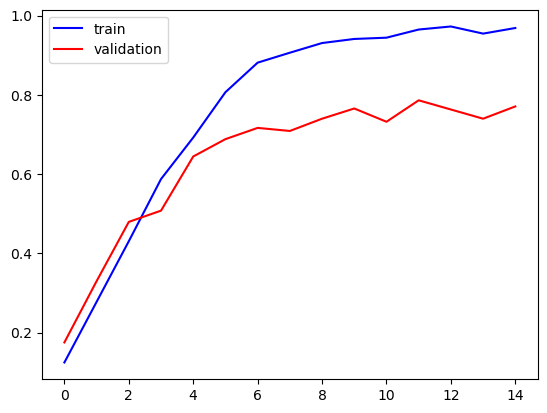

In [84]:
plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.legend()
plt.show()

In [85]:
# Load a separate test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
   "C:/Users/ASUS/Documents/Training.csv[1]/Animal Classification/dataset" ,
    image_size=(180, 180),
    batch_size=32
)

 
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


Found 1944 files belonging to 15 classes.
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9574 - loss: 0.3510
Test Accuracy: 0.95


In [86]:
import numpy as np
from tensorflow.keras.preprocessing import image



def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(180, 180)) 
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  
    
    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()
   
    class_label = class_names[predicted_class]
    
    return f"Predicted Class: {class_label}"
